In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Load the dataset
# file_path = './cleaned_data.csv'  
data = pd.read_csv('./Brent_crude_oil.csv')





In [2]:
data.head()

,Date,Close,Open,High,Low,Vol,Changepercent,OVX,VIX,SMA,EMA,DEMA,MACD,Signal,RSI,CCI,Aroon_Up,Aroon_Down,TRIX
0,29-07-2024,79.78,81.30,81.74,79.36,132.25,-1.66,30.82,16.600000,79.227143,78.785521,79.338447,0.709319,0.827026,50.265393,44.513315,56,76,0.170974
1,26-07-2024,81.13,82.40,82.71,80.33,204.95,-1.51,29.77,16.389999,79.233571,79.098118,79.848238,0.837541,0.829129,50.238980,76.528035,96,72,0.168316
2,25-07-2024,82.37,81.58,82.53,80.09,332.16,0.81,26.49,18.459999,79.420000,79.534369,80.562557,1.027373,0.868778,56.945184,76.782026,92,68,0.172012
3,24-07-2024,81.71,81.46,82.23,80.93,298.20,0.86,26.85,18.040001,79.492857,79.824453,80.966956,1.111744,0.917371,52.753780,66.567962,88,64,0.177758
4,23-07-2024,81.01,82.25,82.79,80.51,384.32,-1.69,26.74,14.720000,79.400714,79.982526,81.109691,1.109337,0.955764,46.337308,54.683874,96,60,0.182490


In [3]:
# Data preprocessing: Handle missing values and convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

In [4]:
data.head()

,Close,Open,High,Low,Vol,Changepercent,OVX,VIX,SMA,EMA,DEMA,MACD,Signal,RSI,CCI,Aroon_Up,Aroon_Down,TRIX
Date,,,,,,,,,,,,,,,,,,
2024-07-29,79.78,81.30,81.74,79.36,132.25,-1.66,30.82,16.600000,79.227143,78.785521,79.338447,0.709319,0.827026,50.265393,44.513315,56,76,0.170974
2024-07-26,81.13,82.40,82.71,80.33,204.95,-1.51,29.77,16.389999,79.233571,79.098118,79.848238,0.837541,0.829129,50.238980,76.528035,96,72,0.168316
2024-07-25,82.37,81.58,82.53,80.09,332.16,0.81,26.49,18.459999,79.420000,79.534369,80.562557,1.027373,0.868778,56.945184,76.782026,92,68,0.172012
2024-07-24,81.71,81.46,82.23,80.93,298.20,0.86,26.85,18.040001,79.492857,79.824453,80.966956,1.111744,0.917371,52.753780,66.567962,88,64,0.177758
2024-07-23,81.01,82.25,82.79,80.51,384.32,-1.69,26.74,14.720000,79.400714,79.982526,81.109691,1.109337,0.955764,46.337308,54.683874,96,60,0.182490


In [5]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display the missing values for each column
print(missing_values)

Close            0
Open             0
High             0
Low              0
Vol              0
Changepercent    0
OVX              0
VIX              0
SMA              0
EMA              0
DEMA             0
MACD             0
Signal           0
RSI              0
CCI              0
Aroon_Up         0
Aroon_Down       0
TRIX             0
dtype: int64


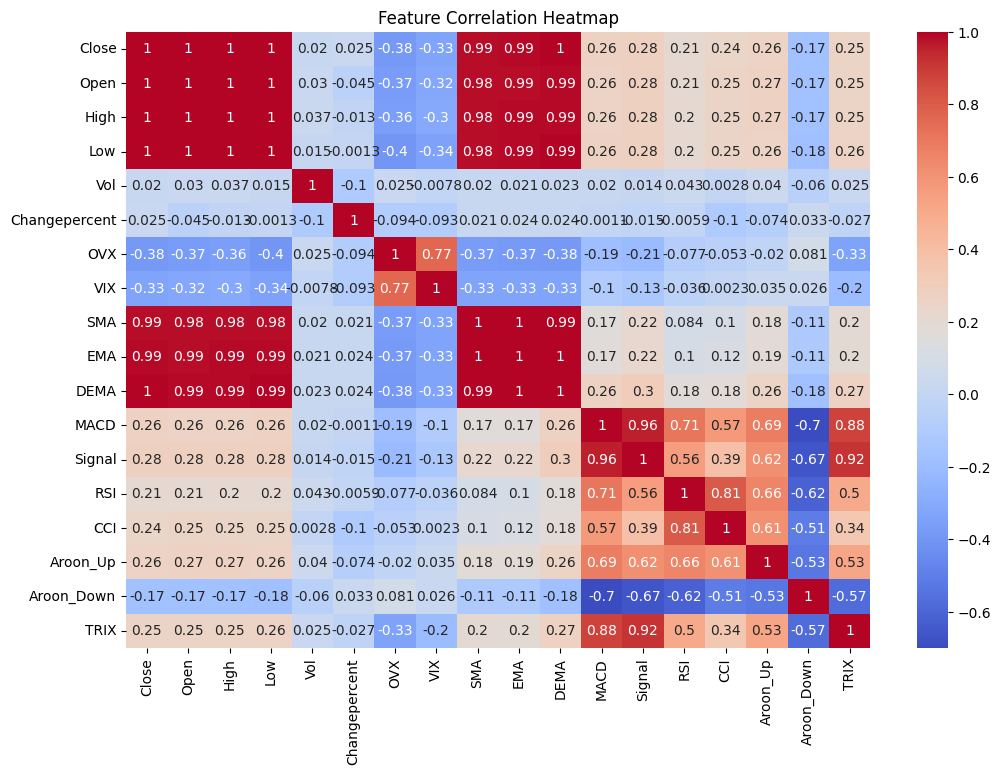

In [6]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()




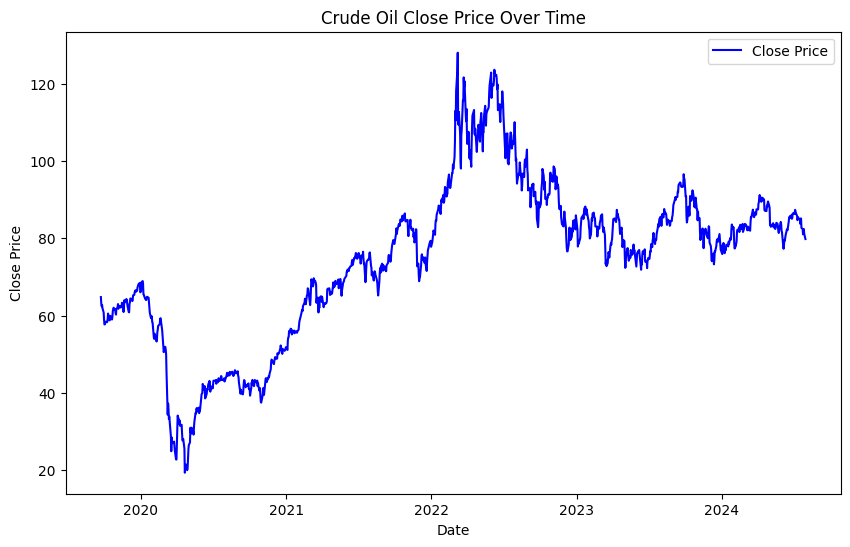

In [7]:
# Plot the target variable ('Close' price) over time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='b')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Crude Oil Close Price Over Time")
plt.legend()
plt.show()



In [8]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('Close', axis=1)  # Features (drop the target column 'Close')
y = data['Close']               # Target variable



In [9]:
# Perform a train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [11]:
# Predict on the test set
y_pred = model.predict(X_test)



In [12]:
# Evaluate the model using RMSE, MAE, and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [13]:
# Print the evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')



RMSE: 5.159050945441804
MAE: 2.806140573770488
R²: 0.8566689702627066


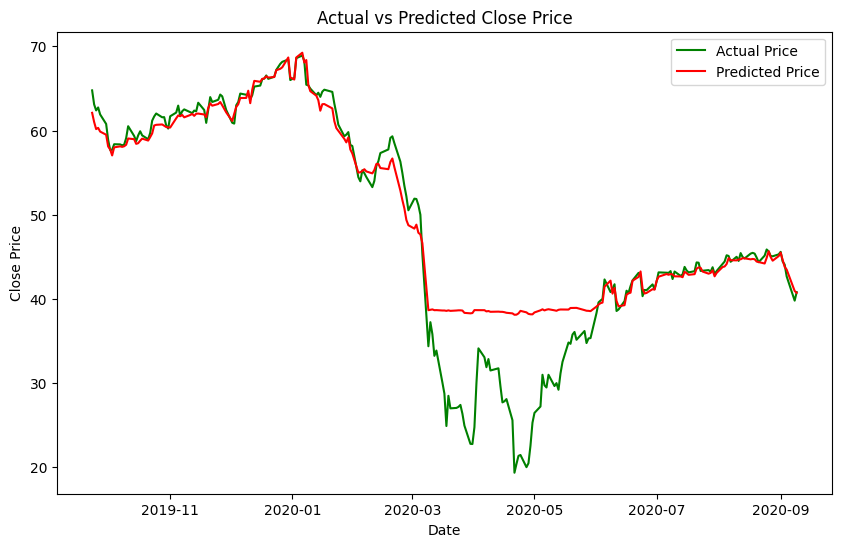

In [14]:
# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual Price', color='g')
plt.plot(X_test.index, y_pred, label='Predicted Price', color='r')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Price")
plt.legend()
plt.show()



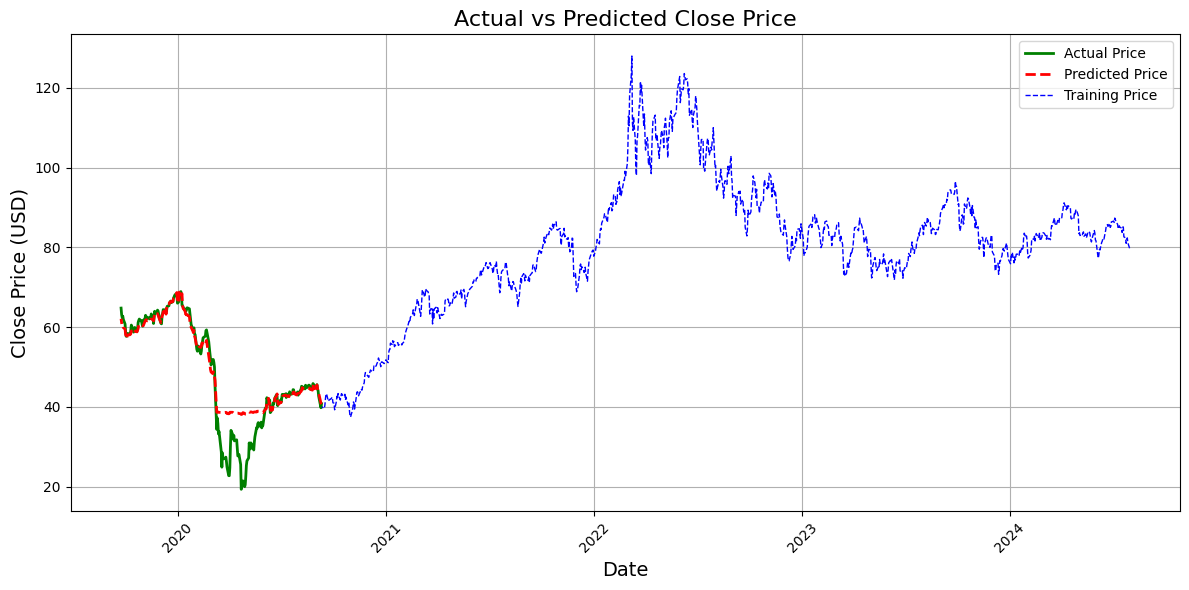

In [15]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, label='Actual Price', color='green', linewidth=2)
plt.plot(X_test.index, y_pred, label='Predicted Price', color='red', linestyle='--', linewidth=2)
plt.plot(X_train.index, y_train, label='Training Price', color='blue', linestyle='--', linewidth=1)  # Only if y_train is needed for context
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price (USD)", fontsize=14)
plt.title("Actual vs Predicted Close Price", fontsize=16)
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fitting
plt.show()


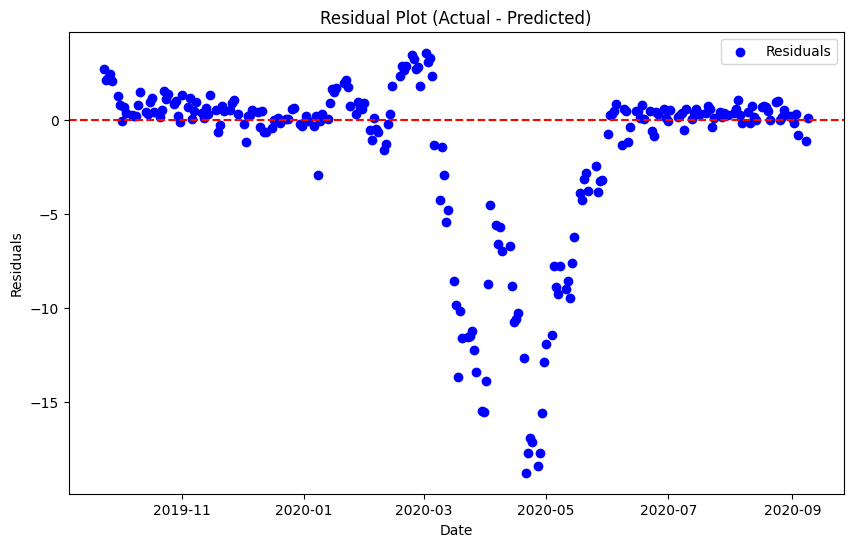

In [16]:
# Plot residual errors (actual - predicted)
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(X_test.index, residuals, color='blue', label='Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.title("Residual Plot (Actual - Predicted)")
plt.legend()
plt.show()



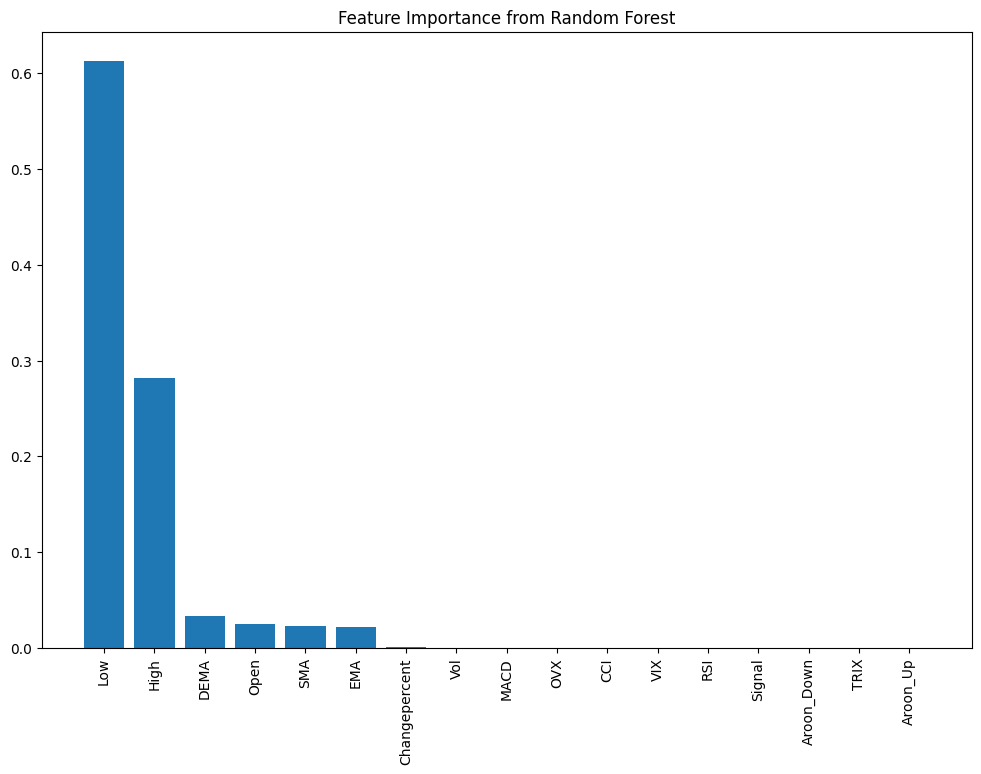

In [17]:
# Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importance from Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()